# import required Libraries


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
df.shape

(1000, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [39]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [42]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [43]:
for col in (['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']):
    print(f'categories in {col}:', end=' ')
    print(df[col].unique())

categories in gender: ['female' 'male']
categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch: ['standard' 'free/reduced']
categories in test preparation course: ['none' 'completed']


In [44]:
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f'we have total {len(numeric_features)} numeric features. \nnumeric feature are {numeric_features}')
print(f'we have total {len(categorical_features)} numeric features. \nnumeric feature are {categorical_features}')

we have total 3 numeric features. 
numeric feature are ['math score', 'reading score', 'writing score']
we have total 5 numeric features. 
numeric feature are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [45]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = round(df['total_score']/3, 2)

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [47]:
math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

In [48]:
print(f'total number of student who score full in math_exam are {math_full}')
print(f'total number of student who score full in reading_exam are {reading_full}')
print(f'total number of student who score full in writing_exam are {writing_full}')

total number of student who score full in math_exam are 7
total number of student who score full in reading_exam are 17
total number of student who score full in writing_exam are 14


In [49]:
math_less_20 = df[df['math score'] < 20]['average'].count()
reading_less_20 = df[df['reading score'] < 20]['average'].count()
writing_less_20 = df[df['writing score'] < 20]['average'].count()

In [50]:
print(f'total number of student who score less then 20 in math_exam are {math_less_20}')
print(f'total number of student who score less then 20 in reading_exam are {reading_less_20}')
print(f'total number of student who score less then 20 in writing_exam are {writing_less_20}')

total number of student who score less then 20 in math_exam are 4
total number of student who score less then 20 in reading_exam are 1
total number of student who score less then 20 in writing_exam are 3


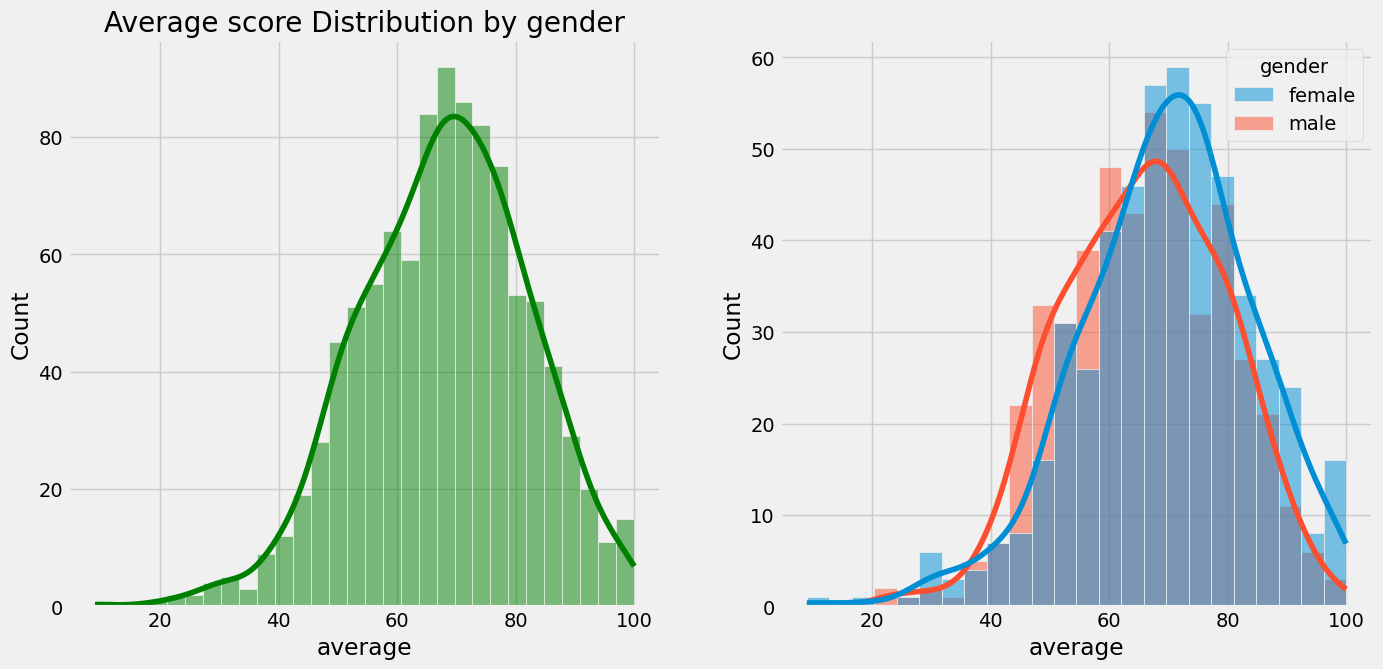

In [51]:
fig, axe = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(ax=axe[0], x='average', bins=30, kde=True, data=df, color='g')
sns.histplot(data=df, x='average', hue='gender', ax=axe[1], kde=True, alpha=0.5)
axe[0].set_title('Average score Distribution')
axe[0].set_title('Average score Distribution by gender')
plt.show()

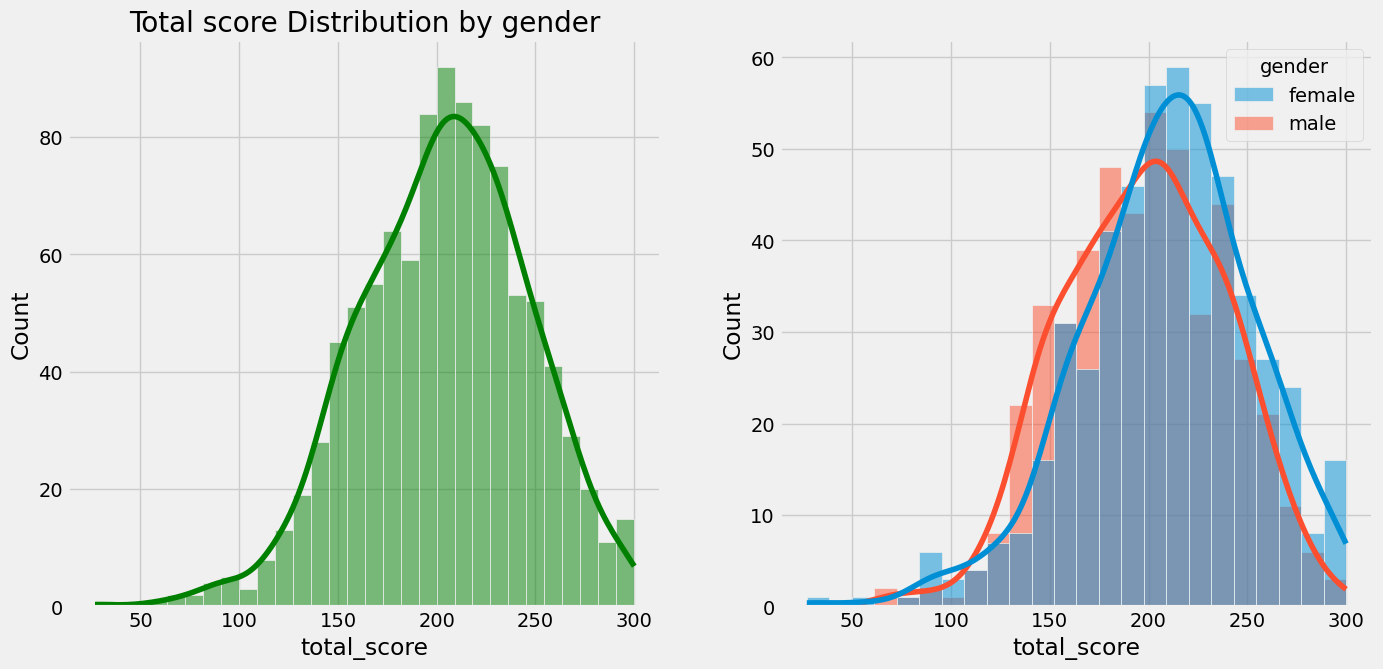

In [52]:
fig, axe = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(ax=axe[0], x='total_score', bins=30, kde=True, data=df, color='g')
sns.histplot(data=df, x='total_score', hue='gender', ax=axe[1], kde=True, alpha=0.5)
axe[0].set_title('Total score Distribution')
axe[0].set_title('Total score Distribution by gender')
plt.show()

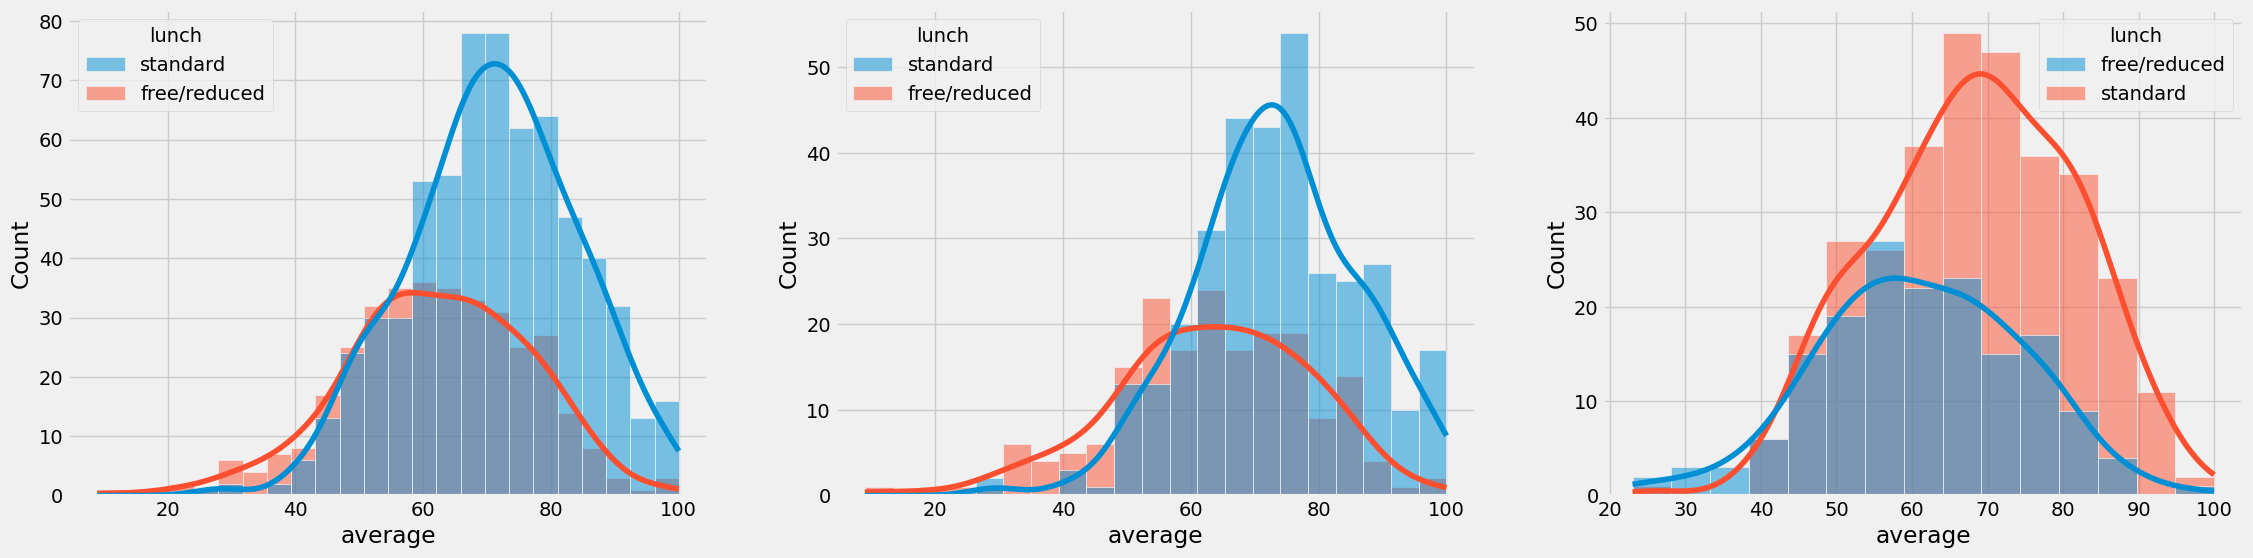

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch', ax=axs[1])
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch', ax=axs[2])
plt.show()


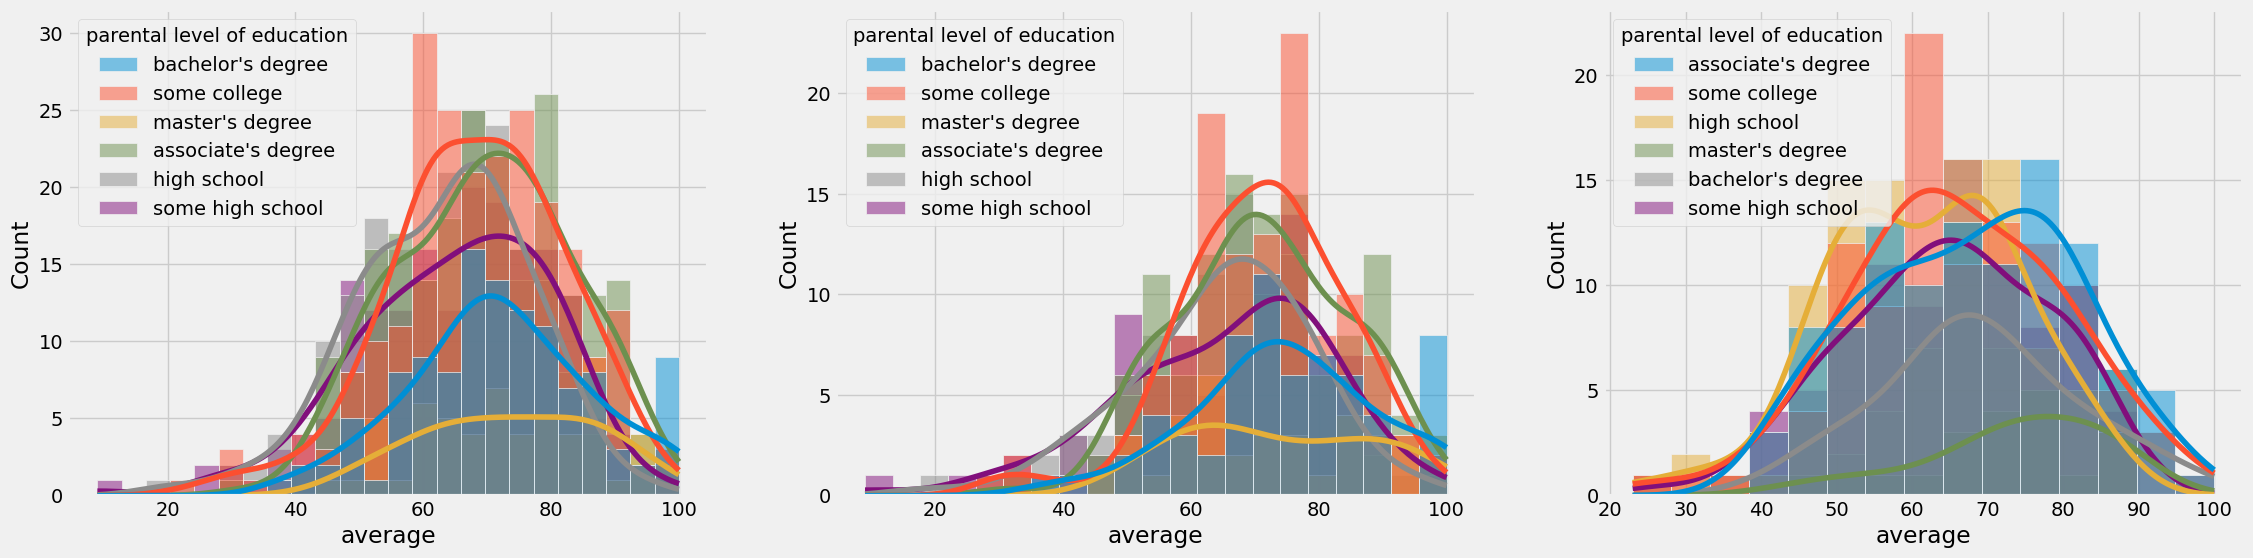

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(data=df, x='average', kde=True, hue='parental level of education', ax=axs[0])
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='parental level of education', ax=axs[1])
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='parental level of education', ax=axs[2])
plt.show()

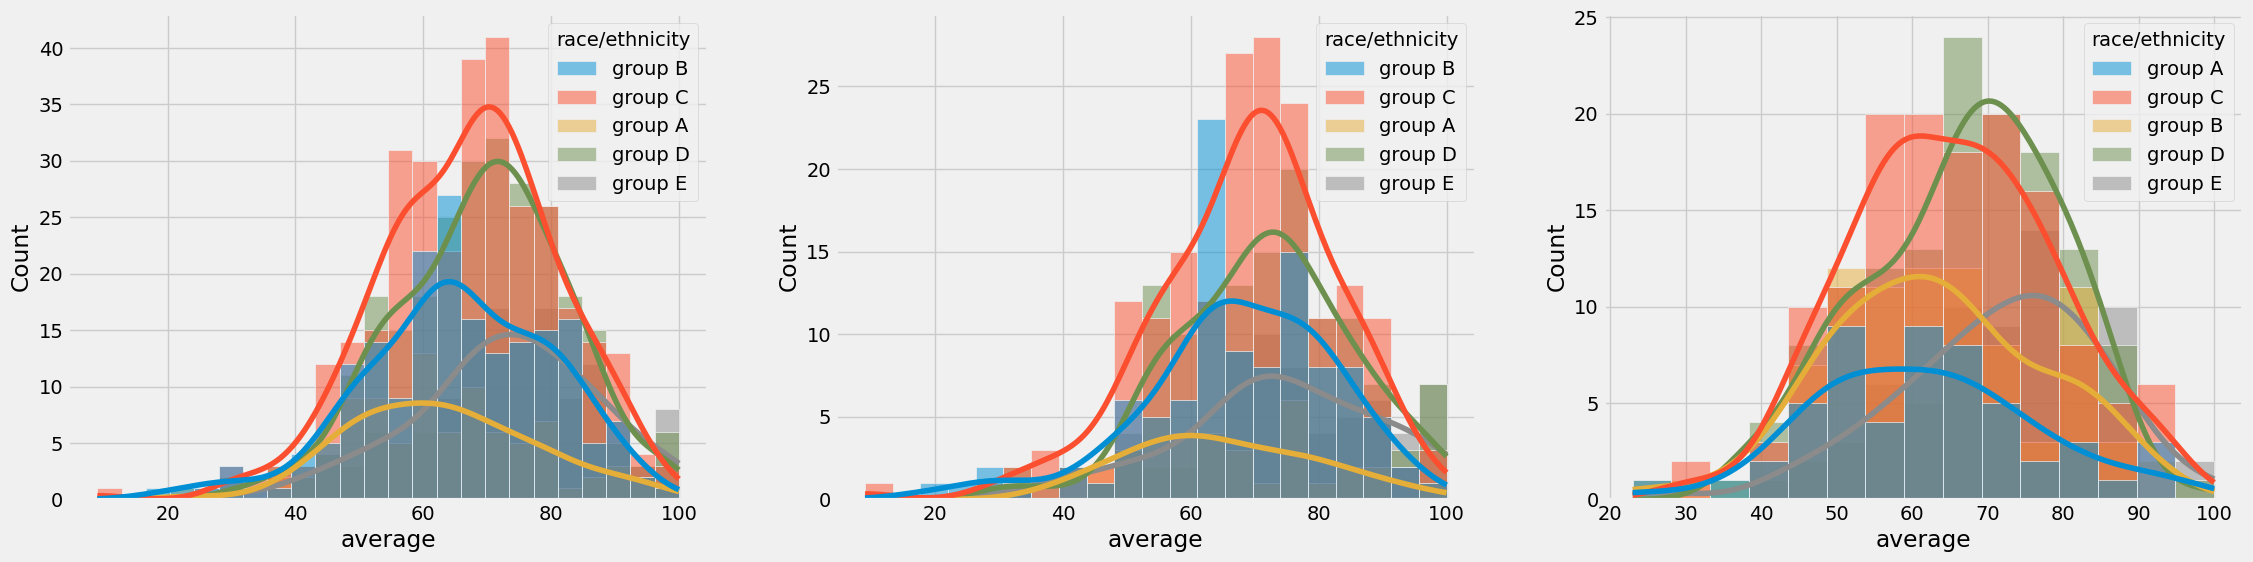

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', ax=axs[0])
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='race/ethnicity', ax=axs[1])
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='race/ethnicity', ax=axs[2])
plt.show()

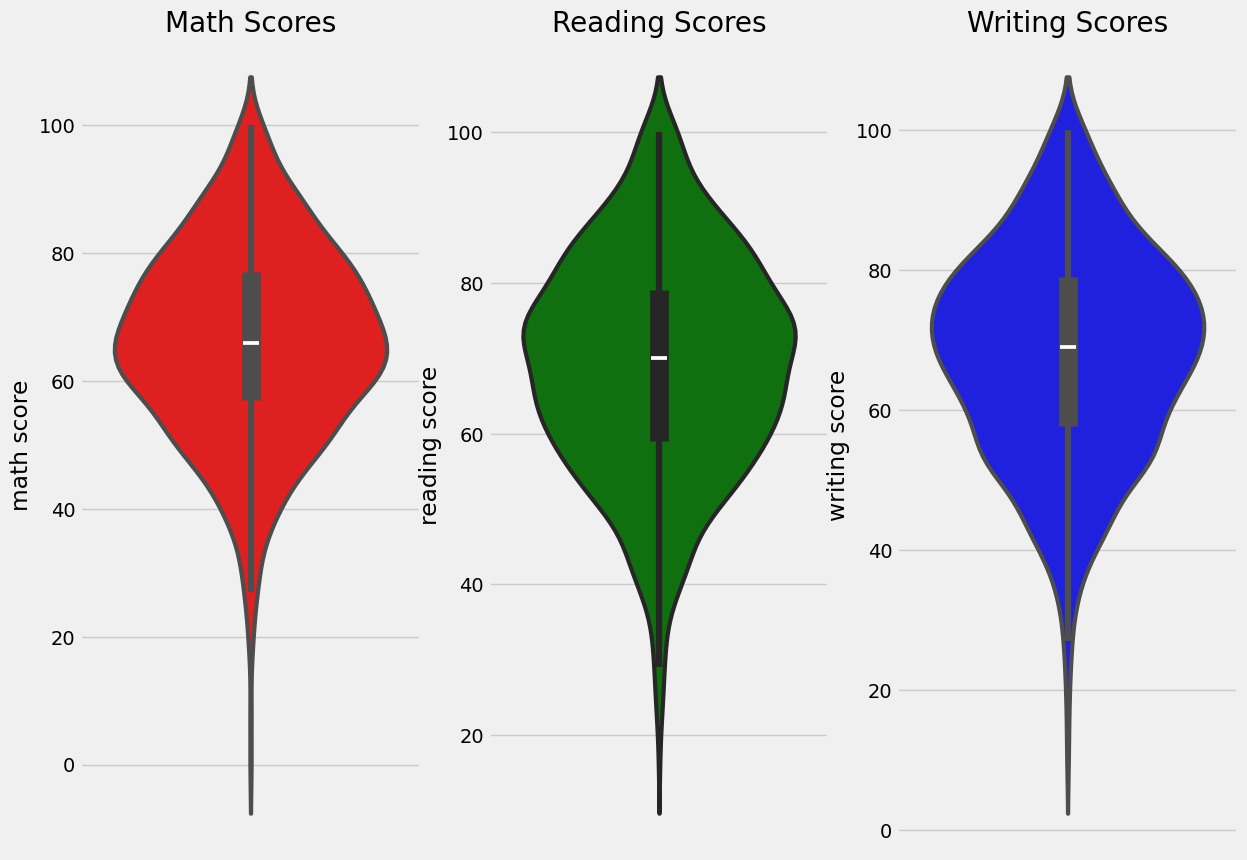

In [56]:
plt.figure(figsize=(18, 10))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(data=df, y='math score', color = 'red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(data=df, y='reading score', color = 'green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(data=df, y='writing score', color = 'blue', linewidth=3)
plt.show()

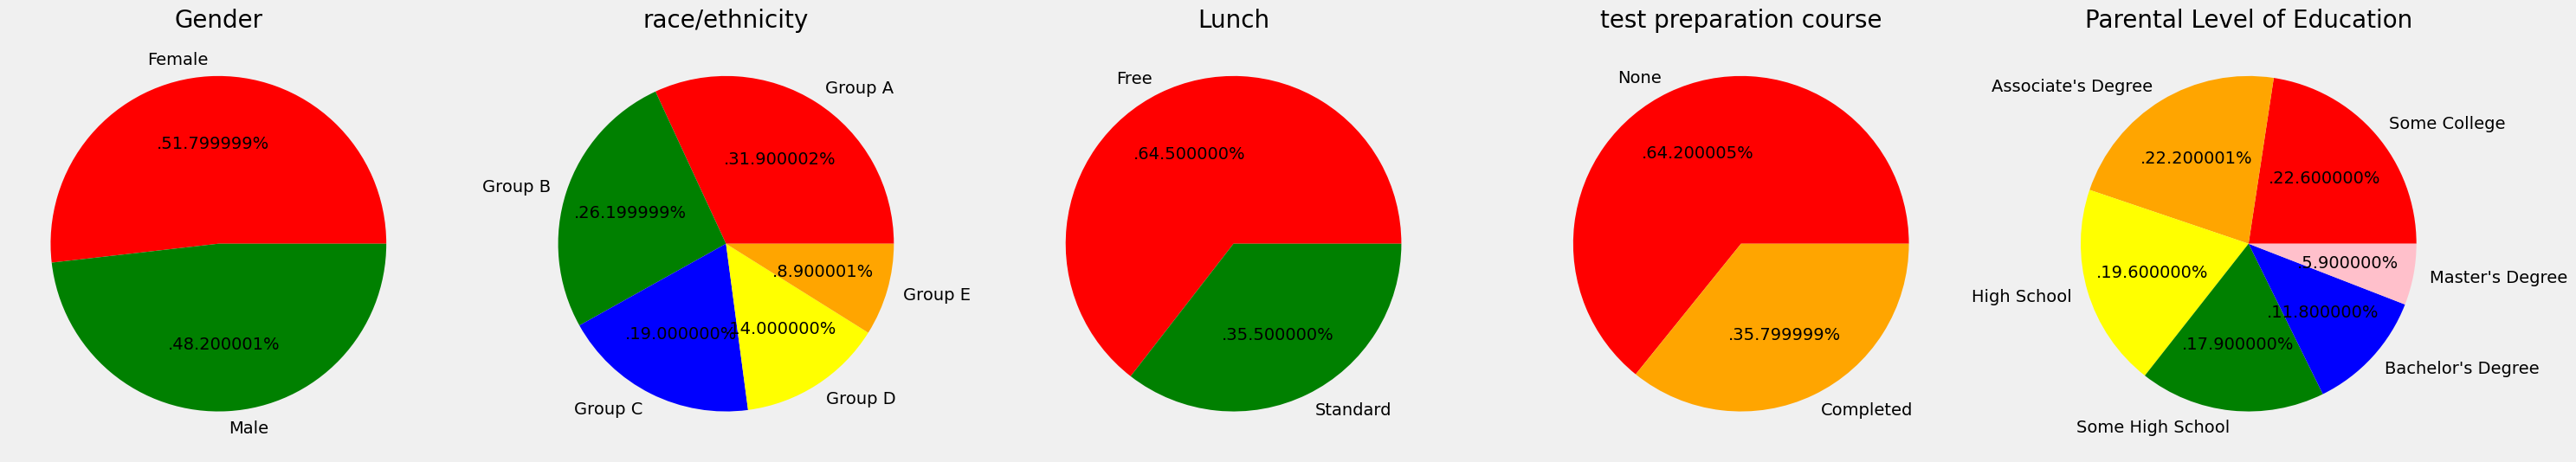

In [57]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red', 'green', 'blue', 'yellow', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('race/ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Free', 'Standard'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('test preparation course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', 'Bachelor\'s Degree', 'Master\'s Degree'  
color = ['red', 'orange', 'yellow', 'green', 'blue', 'pink']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Level of Education', fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

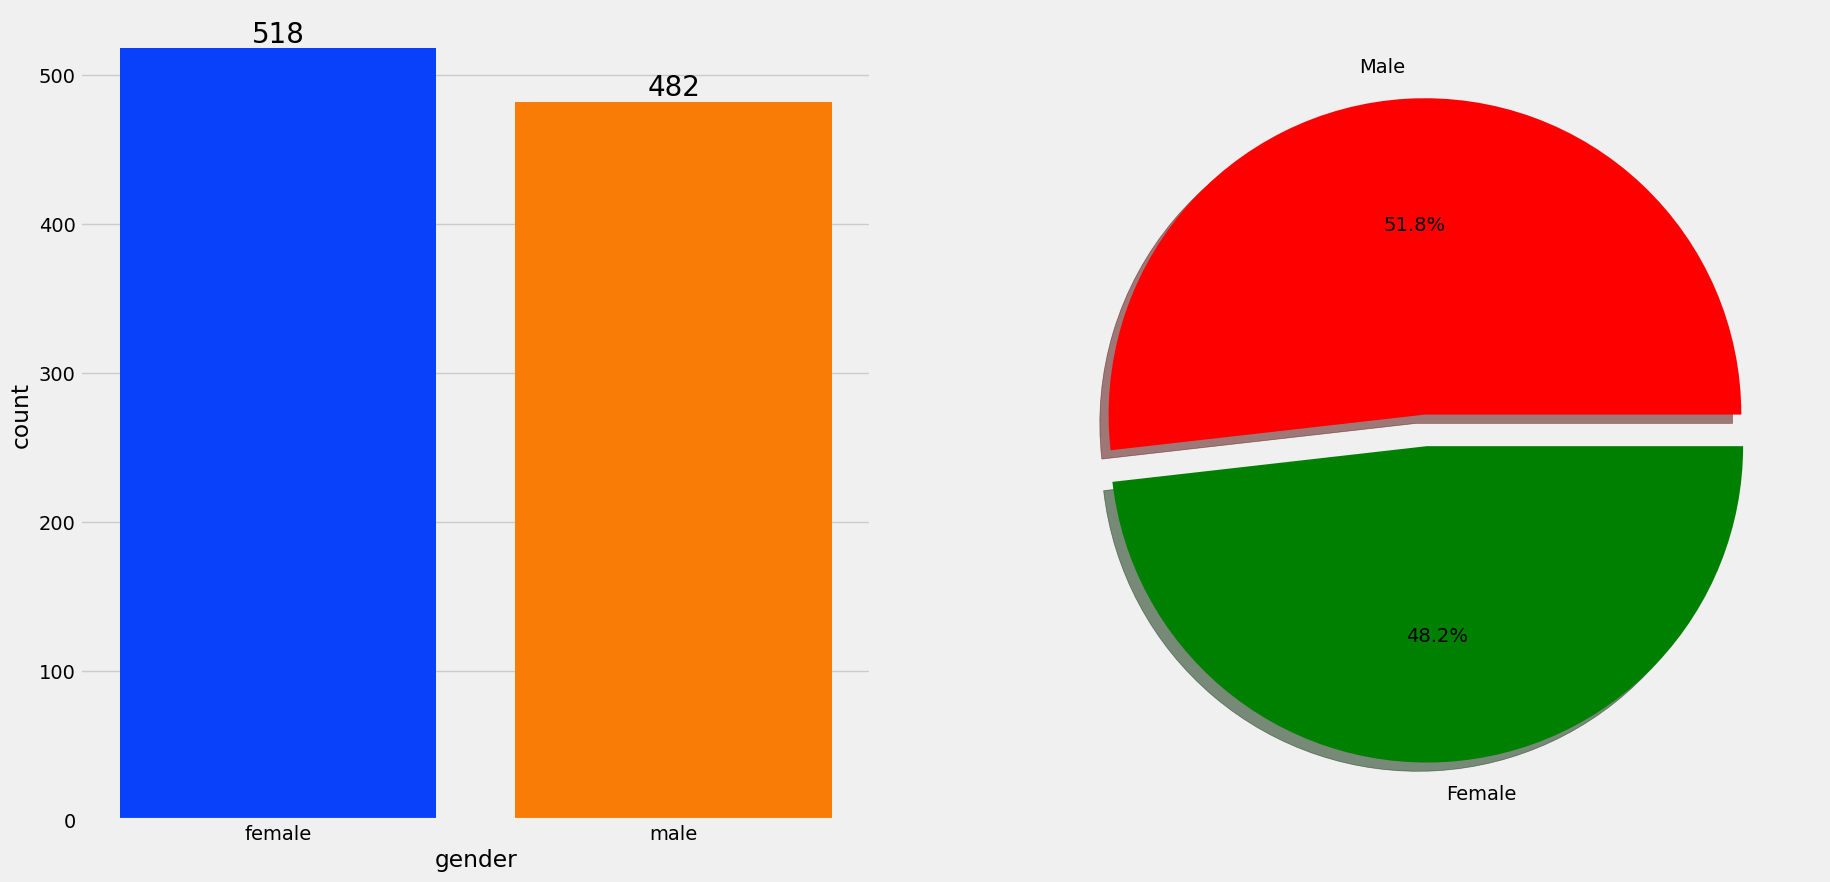

In [58]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(data=df, x=df['gender'], palette='bright', ax=ax[0], saturation=0.95)
for con in ax[0].containers:
    ax[0].bar_label(con, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['red', 'green'])

plt.show()

In [59]:
gender_groupby = df.groupby(['gender'])[['average', 'total_score', 'math score', 'writing score', 'reading score']].mean()
gender_groupby

,average,total_score,math score,writing score,reading score
gender,,,,,
female,69.569498,208.708494,63.633205,72.467181,72.608108
male,65.837303,197.512448,68.728216,63.311203,65.473029


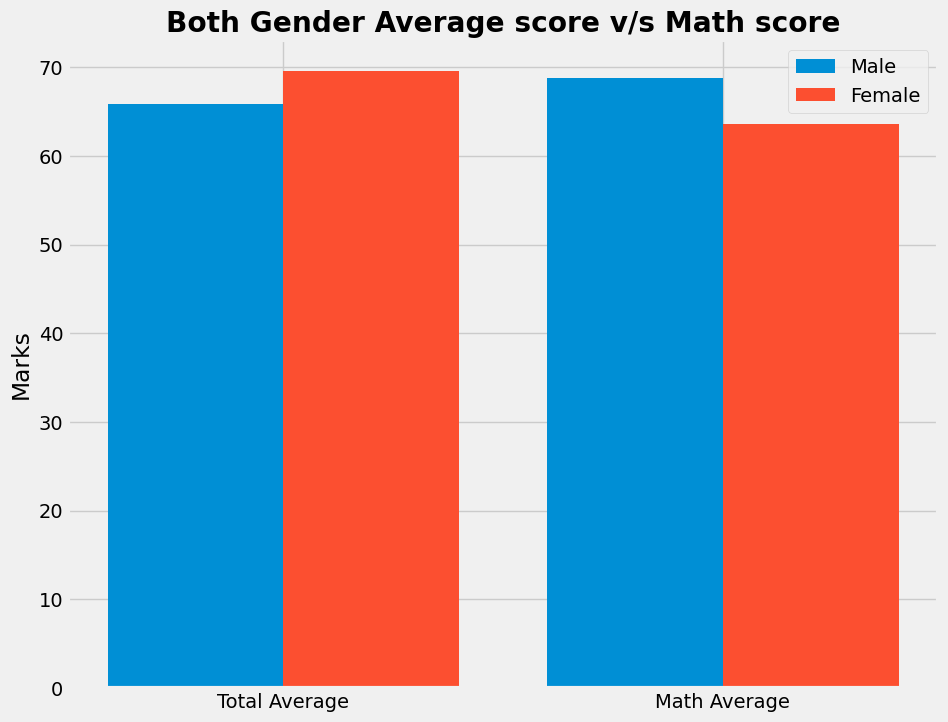

In [60]:
plt.figure(figsize=(10, 8))
X = ['Total Average', 'Math Average']
female_scores = [gender_groupby['average']['female'], gender_groupby['math score']['female']]
male_scores = [gender_groupby['average']['male'], gender_groupby['math score']['male']]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Both Gender Average score v/s Math score', fontweight='bold')
plt.legend()
plt.show()

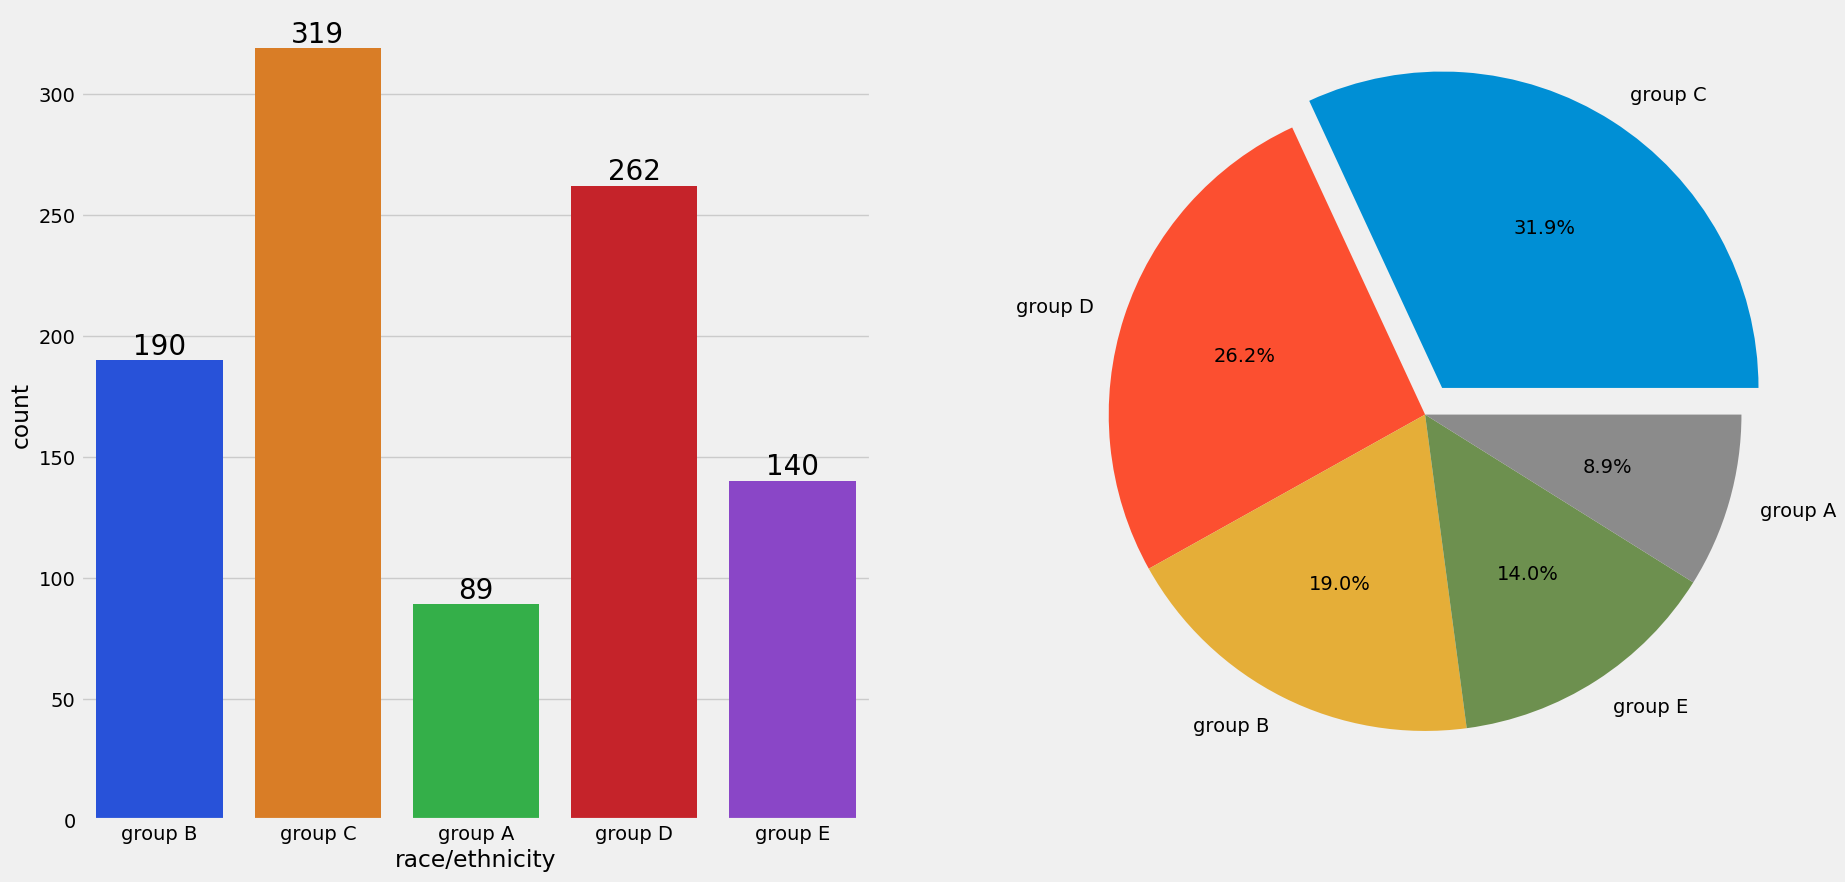

In [61]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.70)
for con in ax[0].containers:
    ax[0].bar_label(con, color='black', size=20)
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%')
plt.show()

In [62]:
group_data2 = df.groupby('race/ethnicity')

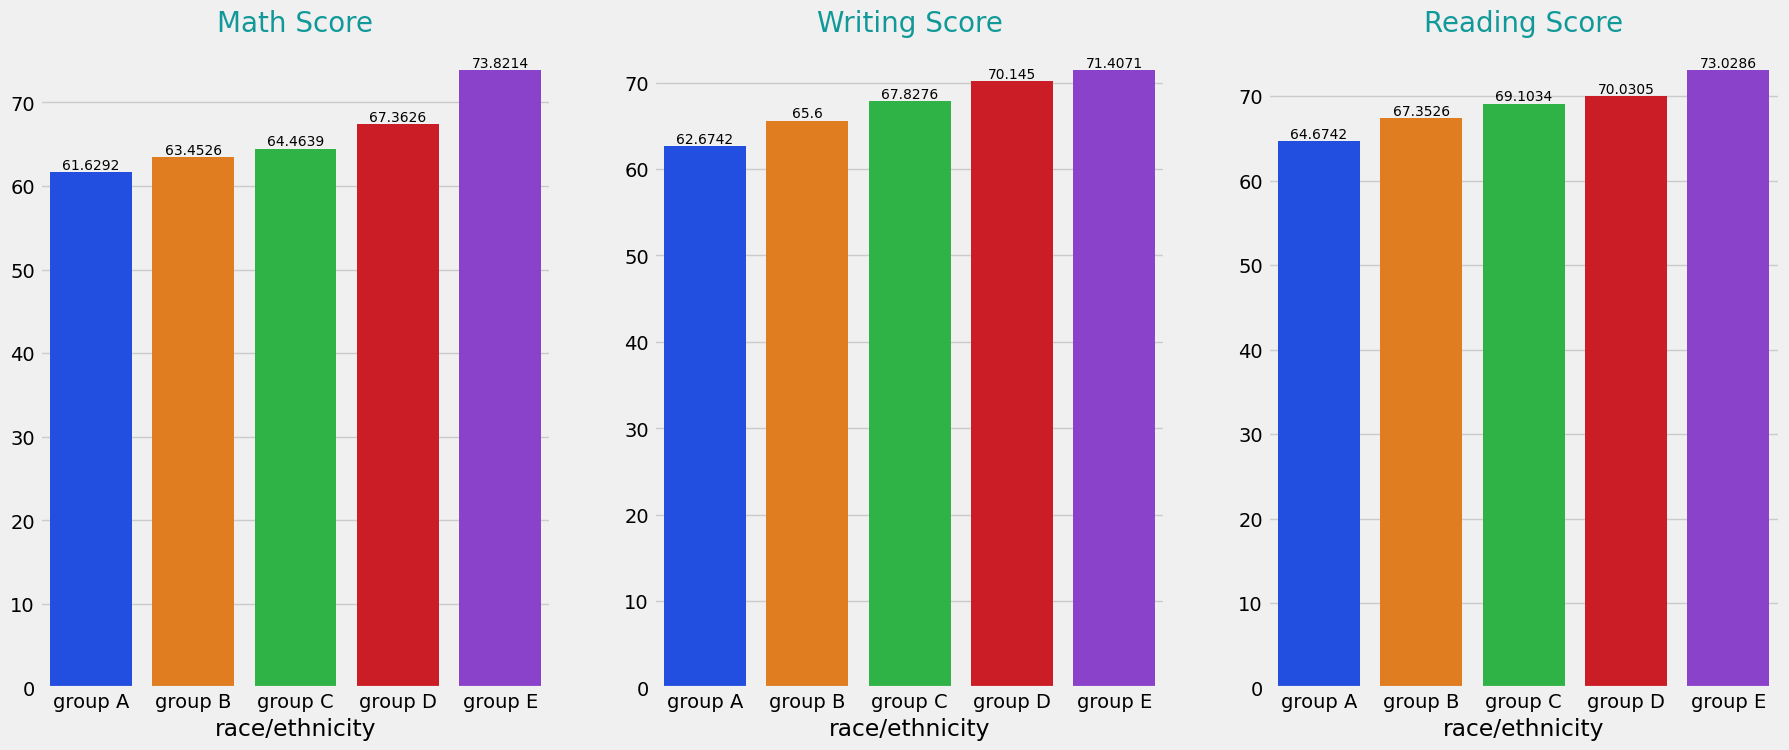

In [63]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=group_data2['math score'].mean().index, y=group_data2['math score'].mean().values, palette='bright', ax=ax[0])
ax[0].set_title('Math Score', color='#119999', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

sns.barplot(x=group_data2['writing score'].mean().index, y=group_data2['writing score'].mean().values, palette='bright', ax=ax[1])
ax[1].set_title('Writing Score', color='#119999', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)

sns.barplot(x=group_data2['reading score'].mean().index, y=group_data2['reading score'].mean().values, palette='bright', ax=ax[2])
ax[2].set_title('Reading Score', color='#119999', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10)

plt.show()

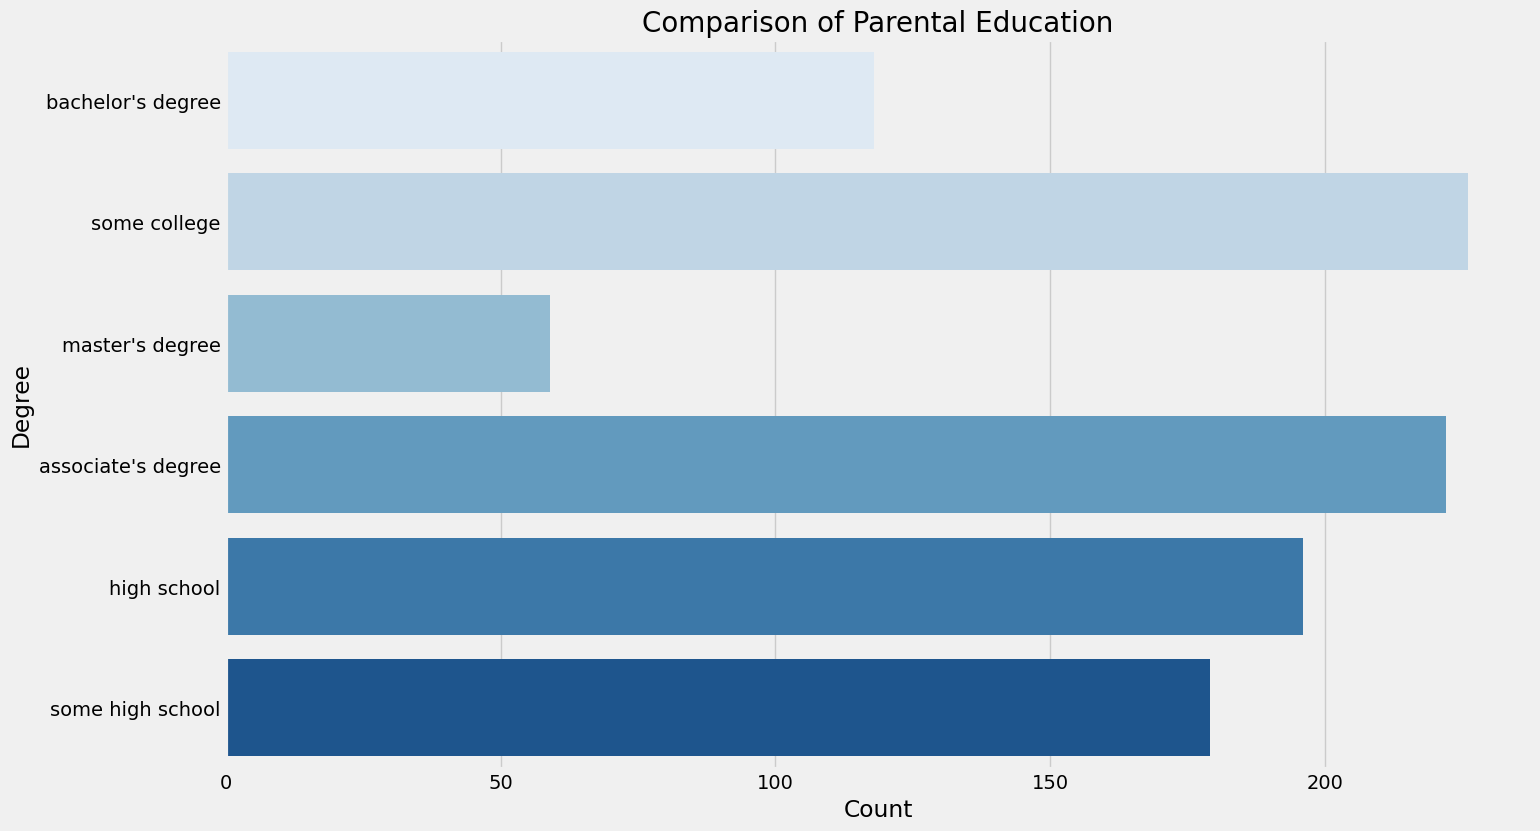

In [64]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(y=df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.ylabel('Degree')
plt.xlabel('Count')

plt.show()

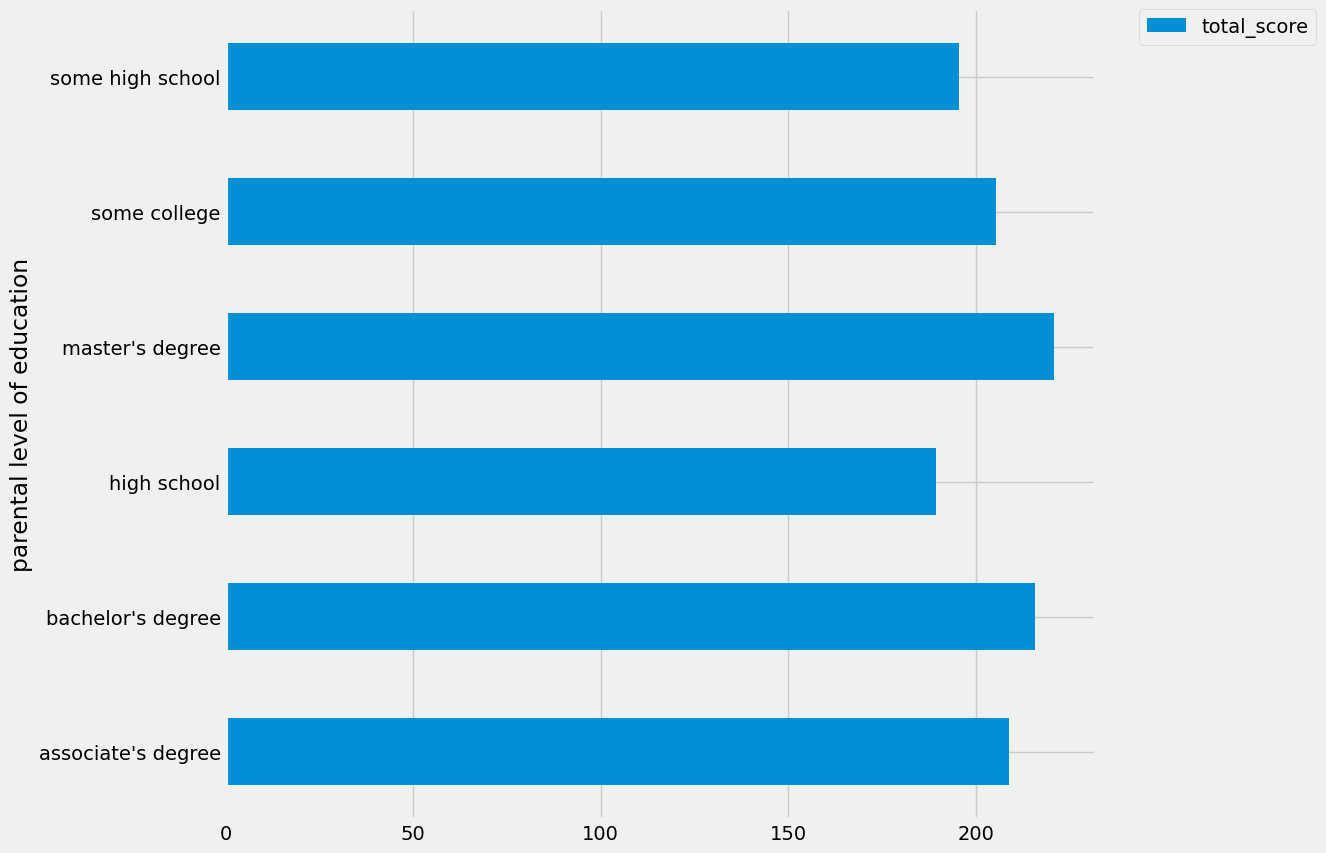

In [65]:
df.groupby('parental level of education')['total_score'].agg('mean').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

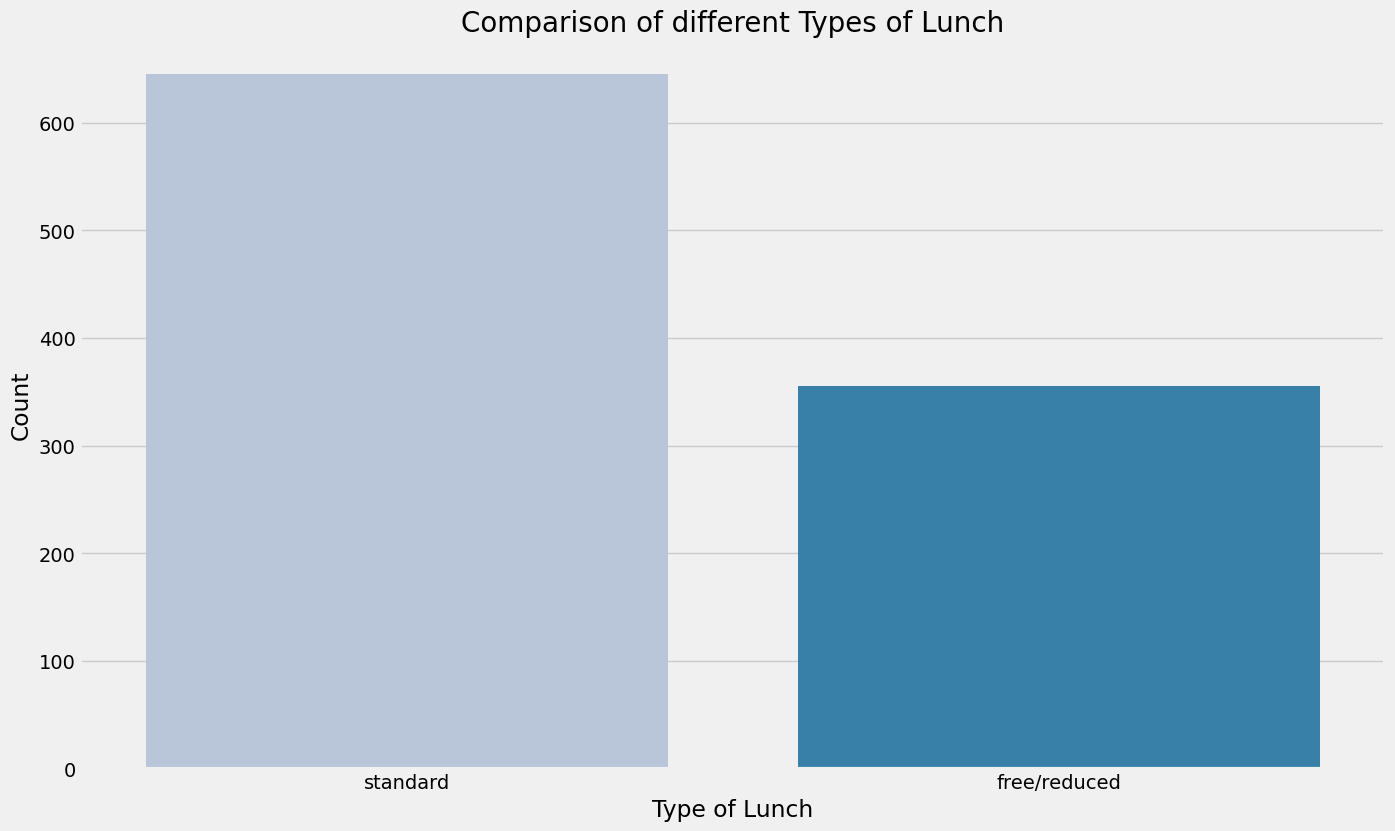

In [81]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['lunch'], palette='PuBu')
plt.title('Comparison of different Types of Lunch', fontweight=30, fontsize=20)
plt.xlabel('Type of Lunch')
plt.ylabel('Count')
plt.show()

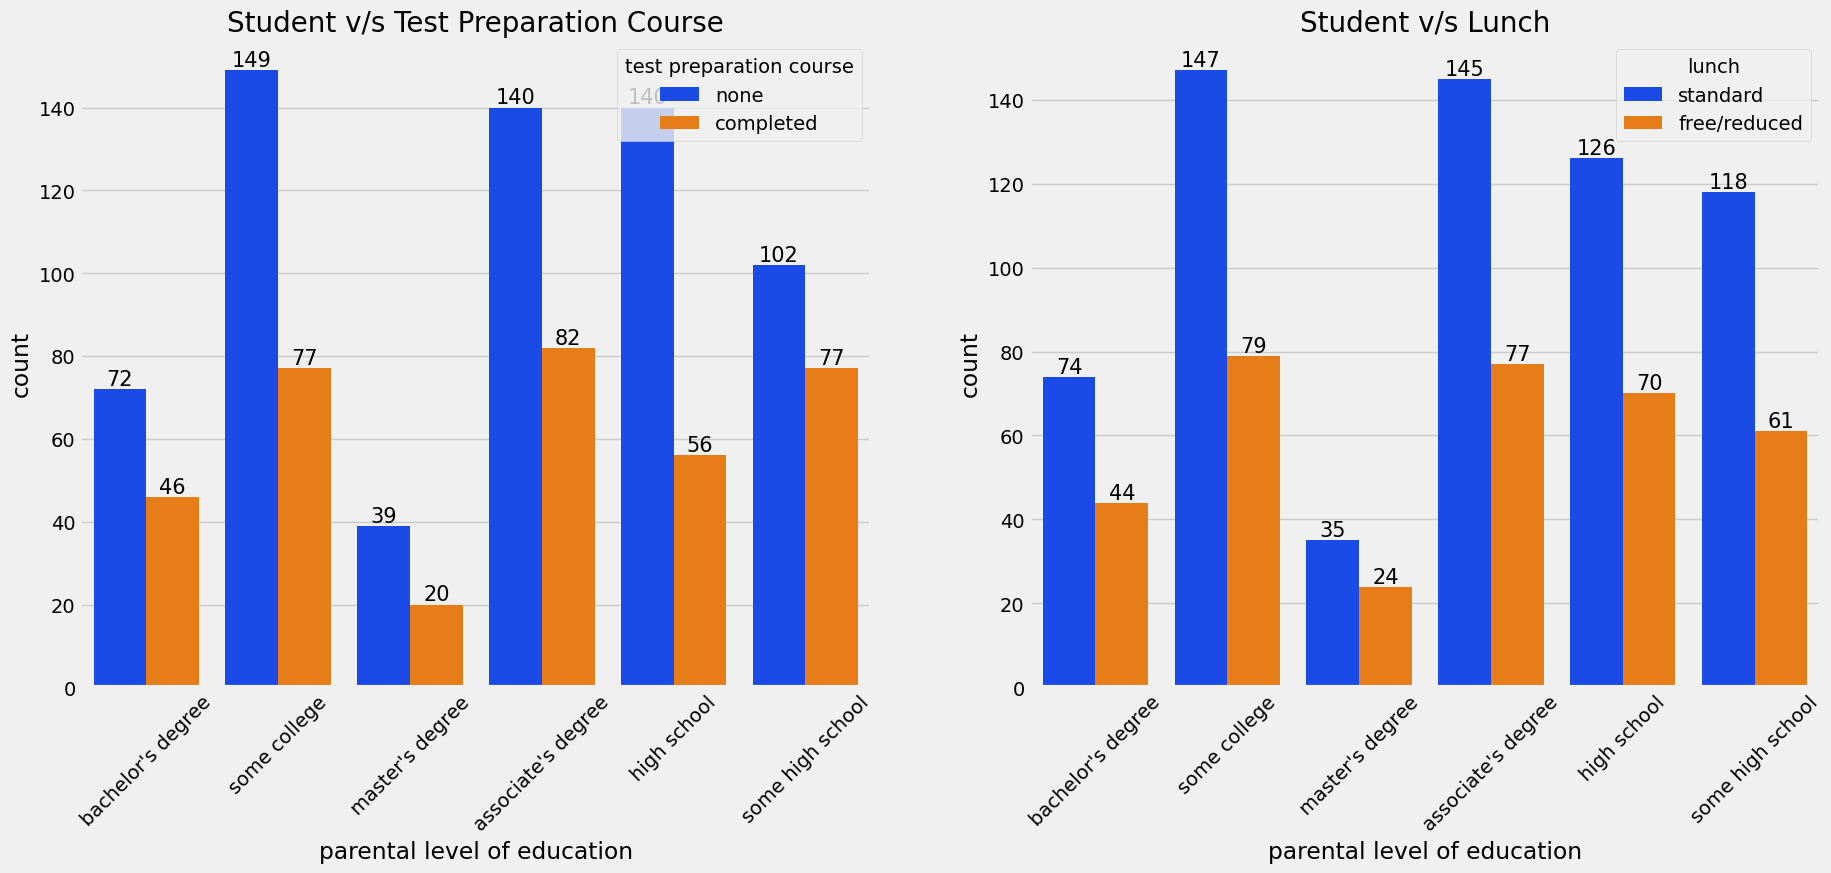

In [104]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=df['parental level of education'], data=df, palette='bright', ax=ax[0], hue='test preparation course', saturation=0.80)
ax[0].set_title('Student v/s Test Preparation Course', color='black', size=20)
ax[0].tick_params(axis='x', rotation=45)
for con in ax[0].containers:
    ax[0].bar_label(con, color='black', size=15)

sns.countplot(x=df['parental level of education'], data=df, palette='bright', ax=ax[1], hue='lunch', saturation=0.80)
ax[1].set_title('Student v/s Lunch', color='black', size=20)
ax[1].tick_params(axis='x', rotation=45)
for con in ax[1].containers:
    ax[1].bar_label(con, color='black', size=15)
plt.show()

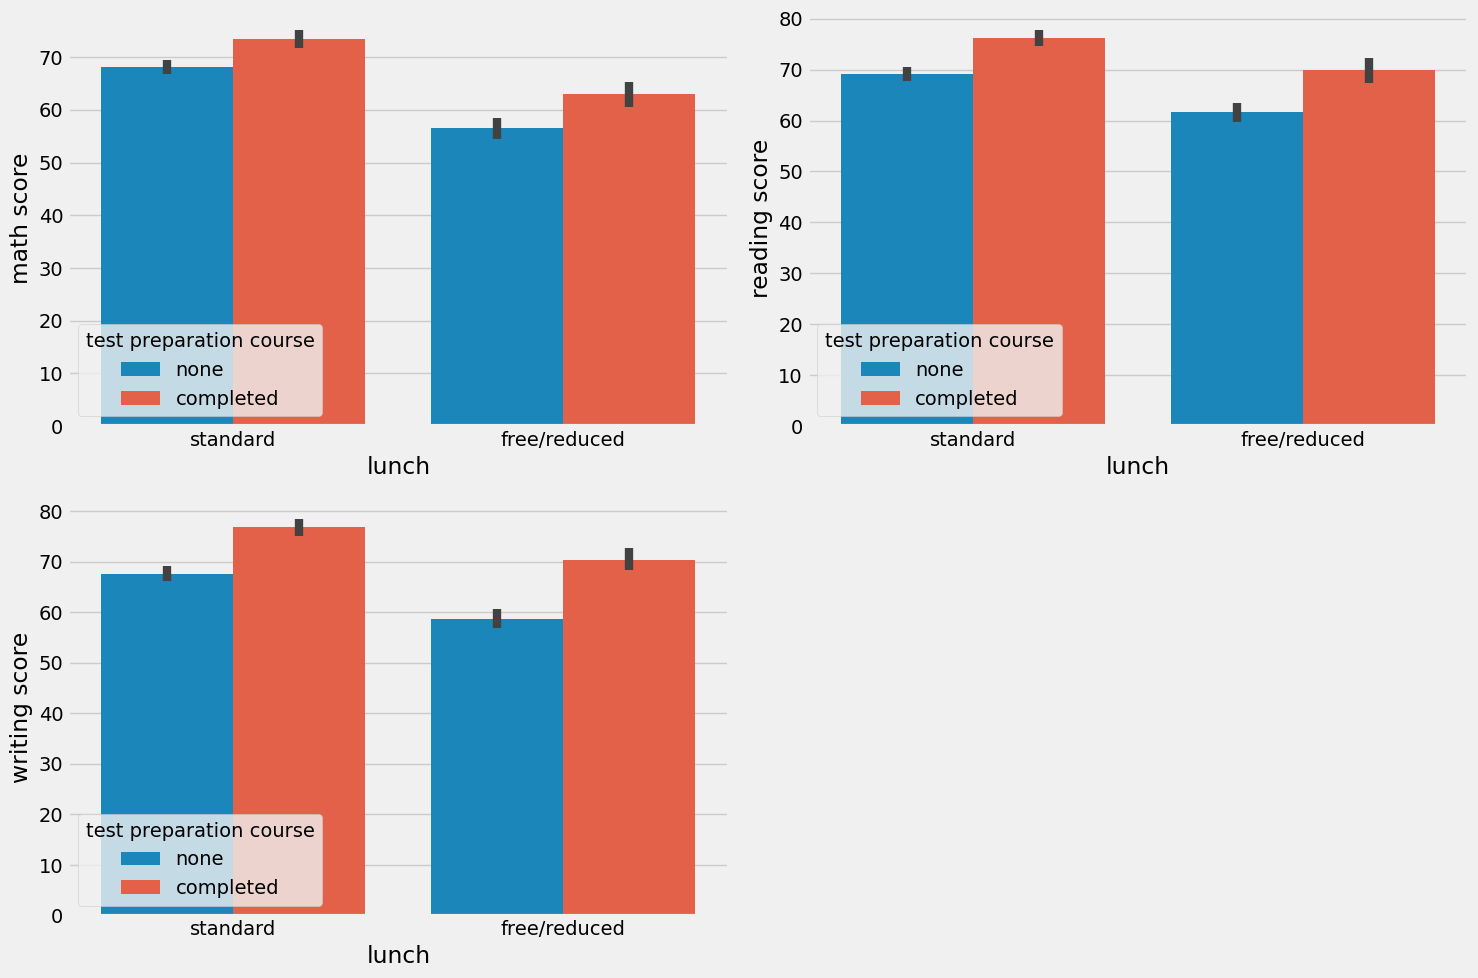

In [130]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math score', data = df, hue='test preparation course')
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading score', data = df, hue='test preparation course')
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing score', data = df, hue='test preparation course')
plt.tight_layout()
plt.show()

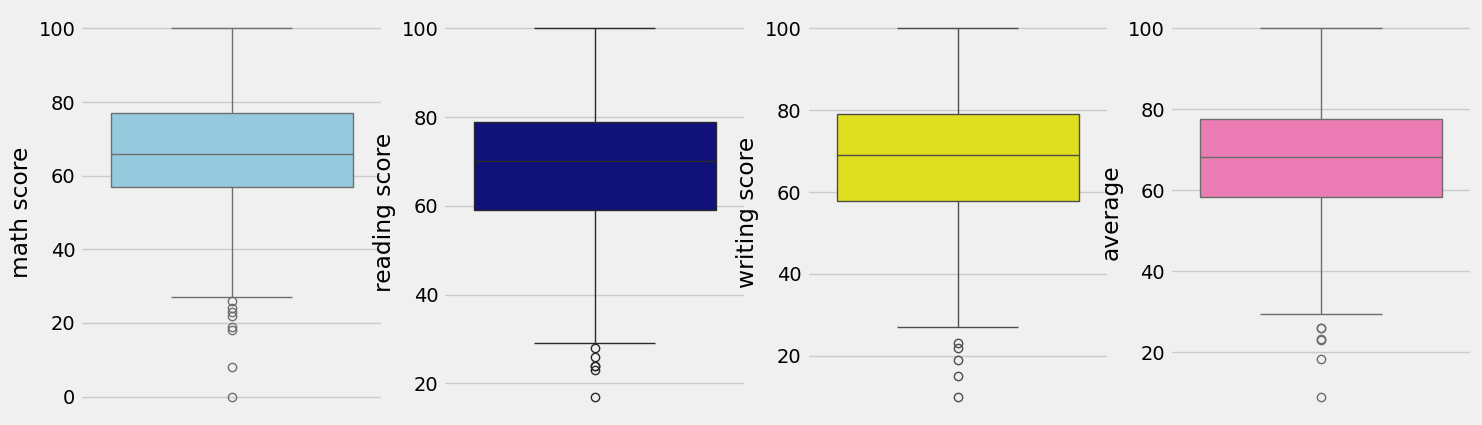

In [136]:
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='darkblue')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='hotpink')
plt.show()

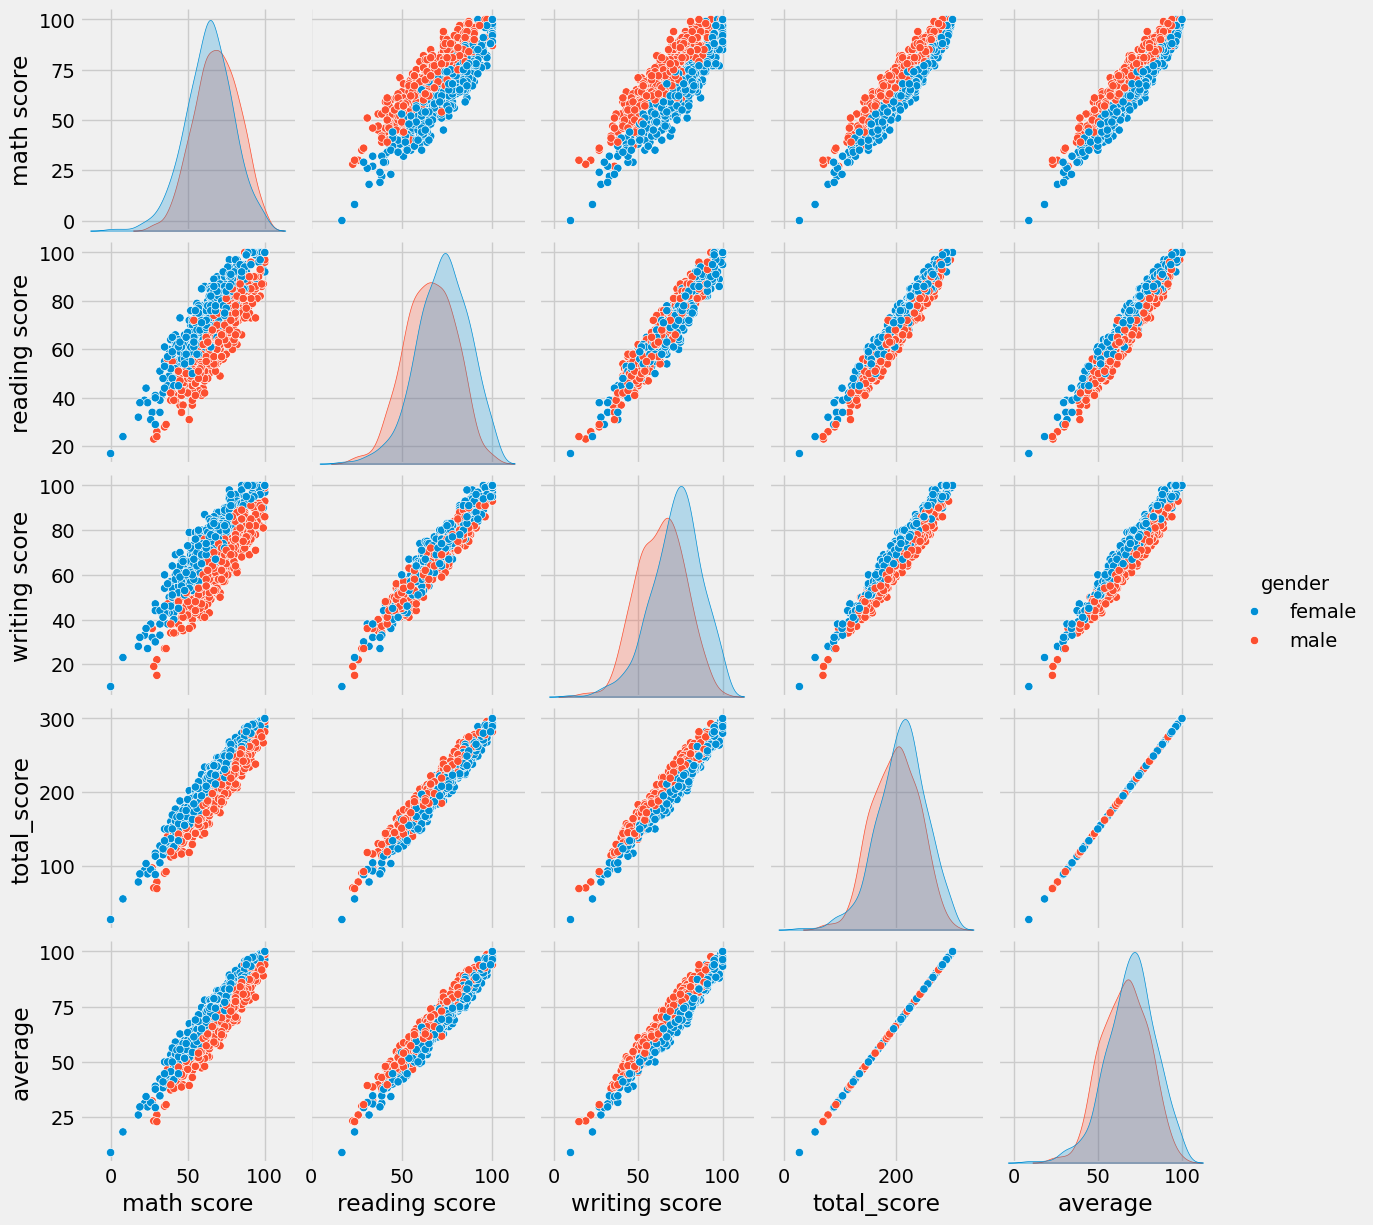

In [137]:
sns.pairplot(df, hue='gender')
plt.show()